### QUESTION 2
Plot “number of tweets in hour” over time for #SuperBowl and #NFL (a histogram with 1-hour bins). The tweets are stored in separate files for different hashtags and files are named as tweet_[#hashtag].txt. Use the hours in a 24-hour day as markers, and count the number of tweets in each of these periods.


In [71]:
hash_tags = ['#nfl','#superbowl']

In [72]:
MODE='FRESH'

import pickle

def save_object(data, fileName):
    with open(fileName + ".pickle", 'wb') as f:
        pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
        
def load_object(fileName):
    try:
        with open(fileName + ".pickle", 'rb') as f:
            data = pickle.load(f)
            return data
    except IOError:
        print("Could not read file: " + fileName)

In [85]:
from datetime import date, timedelta
import datetime
import pytz

def getHour(timestamp):
    d = datetime.datetime.fromtimestamp(timestamp)
    pst = pytz.timezone('America/Los_Angeles')
    d = pst.localize(d)
    return d.hour

def getLocalHourAsKey(timestamp):
    d = datetime.datetime.fromtimestamp(timestamp)
    pst = pytz.timezone('America/Los_Angeles')
    d = pst.localize(d)
    return "{}:{}:{}:{}".format(d.year,d.month,d.day,d.hour)

def getLocalDayAsKey(timestamp):
    d = datetime.datetime.fromtimestamp(timestamp)
    pst = pytz.timezone('America/Los_Angeles')
    d = pst.localize(d)
    return "{}:{}:{}".format(d.year,d.month,d.day)

#https://stackoverflow.com/questions/2315032/how-do-i-find-missing-dates-in-a-list-of-sorted-dates
def getAllDays(dayStrList):
    dayList = [ datetime.datetime.strptime(x, '%Y:%m:%d') for x in dayStrList ]
    
    irange = [i for i in range((dayList[-1] - dayList[0]).days)]
    irange.append(irange[-1]+1)
    
    allDaysList = sorted(list(set(dayList[0] + timedelta(x) for x in irange)))
    allDayStrList = [ ('{}:{}:{}'.format(d.year,d.month,d.day)) for d in allDaysList ]
    return allDayStrList

def sortDayStr(dayStrList):
    dayList = [ datetime.datetime.strptime(x, '%Y:%m:%d:%H') for x in dayStrList ]
    allDaysList = sorted(dayList)
    allDayStrList = [ ('{}:{}:{}:{}'.format(d.year,d.month,d.day,d.hour)) for d in allDaysList ]
    allDayStrListShort = [ ('{}/{}'.format(d.month,d.day)) for d in allDaysList ]
    return allDayStrList, allDayStrListShort

In [90]:
import datetime
import json
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

def getXTicks(keyList):
    xTicks = []
    for i in range(len(keyList)):
        if(i%24 == 0):
            xTicks.append(keyList[i])
        else:
            xTicks.append('')
    return xTicks

# https://stackoverflow.com/questions/16010869/python-plot-a-bar-using-matplotlib-using-a-dictionary
def plotBarChart(dictionary,title,ylabel):
    keys, xaxis = sortDayStr(dictionary.keys())
    yaxis = [dictionary.get(key) for key in keys]
    plt.figure(figsize=(15,9))
    plt.bar(range(len(yaxis)), yaxis, align='center')
    xticks = getXTicks(xaxis)
    plt.xticks(range(len(xticks)), list(xticks),rotation = 90)
    plt.ylabel(ylabel, fontsize=15)
    plt.xlabel("1hr timeperiod within days",fontsize=15)
    plt.title(title,fontsize=18)
    plt.show()

def getTweetsPerHour(tag):
    print("Started "+tag);
    hourToTweets = {}
    dayDict = {}
    filename = 'data/tweets_'+tag+'.txt'
    with open(filename) as f:
        for line in f:
            json_object = json.loads(line)
            dayDict[getLocalDayAsKey(json_object['citation_date'])]=1        
            key = getLocalHourAsKey(json_object['citation_date'])
            if key not in hourToTweets.keys():
                hourToTweets[key]=0
            hourToTweets[key]+=1    
            
    valDict = {}
    dayList = getAllDays(list(dayDict.keys()))
    
    for day in list(dayDict.keys()):
        for h in range(0,24):
            key=day+':'+str(h)
            valDict[key]=hourToTweets.get(key,0)
    
    return valDict

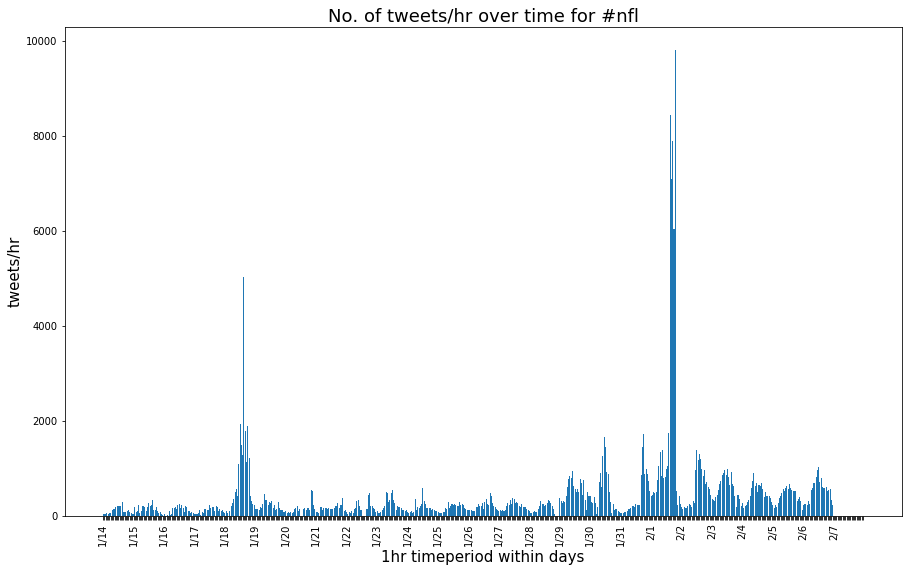

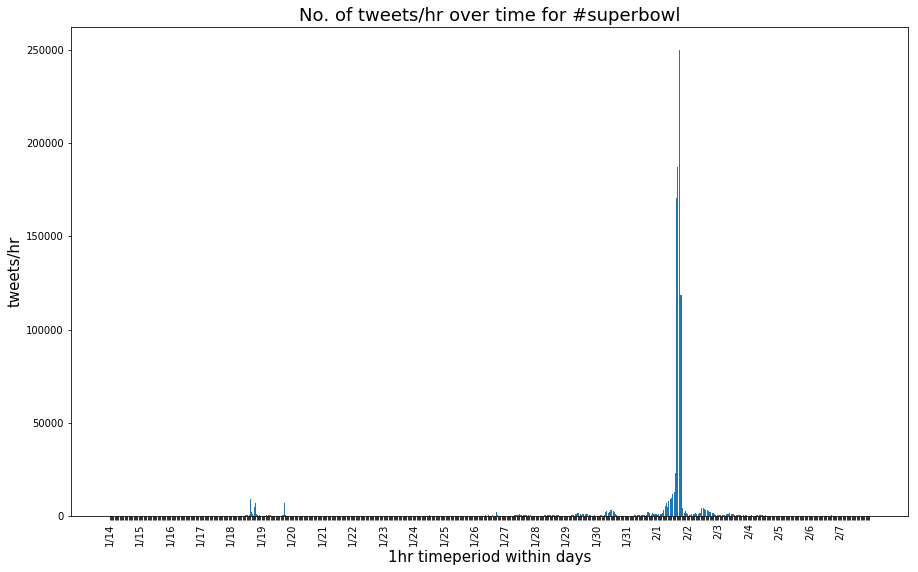

In [91]:
for tag in hash_tags:
    dictionary = getTweetsPerHour(tag)
    save_object(dictionary, "q2_{}".format(tag))
    plotBarChart(dictionary,"No. of tweets/hr over time for {}".format(tag),"tweets/hr")